# Problem Set 1, due April 12th at 3:30 pm 
(in other words, it is due at the start of the class).

### Before You Start
For this problem set, you should download INF0371-PS1.ipynb from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
ipython notebook <name_of_downloaded_file>
```

Make sure the following libraries load correctly (hit Ctrl-Enter).


In [1]:
#IPython is what you are using now to run the notebook
import IPython
print ("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print ("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print ("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       5.1.0 (need at least 1.0)
Numpy version:        1.12.0 (need at least 1.7.1)
SciPy version:        0.18.1 (need at least 0.12.0)
Pandas version:       0.19.2 (need at least 0.11.0)
Maplotlib version:     1.5.3 (need at least 1.2.1)
Scikit-Learn version: 0.17.1 (need at least 0.13.1)


### Working in a group?
List the names of other students with whom you worked on this problem set:
- Arvind K.
- Kimiko F.

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

Use the following commands to load the dataset:

In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [3]:
print (bdata.keys())
print (bdata.feature_names)
print (bdata.data.shape)
print (bdata.target.shape)

# uncomment the following if you want to see a lengthy description of the dataset
# print bdata.DESCR

dict_keys(['feature_names', 'target', 'data', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


In [4]:
boston = pd.DataFrame(bdata.data, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
boston["MEDV"] = bdata.target
print (boston)

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   

In [8]:
#boston.columns = bdata.feature_names[:]
#print (boston.shape)

---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - 1.1.3: Show that dataset does not contain any missing values.
 - 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

In [5]:
# 1.1.1
# Number of different variables
print ("1.1.1")
print (list(boston.columns.values))
print()

# Number of different observations
print (boston.shape)
print ()

# 1.1.2
print ("1.1.2")
boston_CHAS_1_df = boston.drop(boston[boston.CHAS < 1].index)
print (boston_CHAS_1_df)
print (boston_CHAS_1_df.shape)
print()

# 1.1.3
print ("1.1.3")
print (boston.info())
print (boston.count())
print ()

# 1.1.4
print ("1.1.4")
df_high_median_price_desc = boston.sort('MEDV', ascending=False)
print (df_high_median_price_desc.head(n=5))

1.1.1
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

(506, 14)

1.1.2
        CRIM    ZN  INDUS  CHAS     NOX     RM    AGE     DIS   RAD    TAX  \
142  3.32105   0.0  19.58   1.0  0.8710  5.403  100.0  1.3216   5.0  403.0   
152  1.12658   0.0  19.58   1.0  0.8710  5.012   88.0  1.6102   5.0  403.0   
154  1.41385   0.0  19.58   1.0  0.8710  6.129   96.0  1.7494   5.0  403.0   
155  3.53501   0.0  19.58   1.0  0.8710  6.152   82.6  1.7455   5.0  403.0   
160  1.27346   0.0  19.58   1.0  0.6050  6.250   92.6  1.7984   5.0  403.0   
162  1.83377   0.0  19.58   1.0  0.6050  7.802   98.2  2.0407   5.0  403.0   
163  1.51902   0.0  19.58   1.0  0.6050  8.375   93.9  2.1620   5.0  403.0   
208  0.13587   0.0  10.59   1.0  0.4890  6.064   59.1  4.2392   4.0  277.0   
209  0.43571   0.0  10.59   1.0  0.4890  5.344  100.0  3.8750   4.0  277.0   
210  0.17446   0.0  10.59   1.0  0.4890  5.960   92.1  3.8771   4.0  277.0   
211  0.37578

/Users/marisananakul/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


*Provide our answers below:*

 - 1.1.1: There are 14 variables in the dataset and 506 different observations. There are 13 variables in the dataset but because "MEDV" was the target variable, it was not initially included in the original dataset.
 - 1.1.2: There are 35 neighborhood instances where the tract bounds the Charles River.
 - 1.1.3: The boston.info() method shows that each column has 506 instances. The boston.count() method returns the number of observations in each column, and each column has 506 instances, meaning that there are no missing values.
 - 1.1.4: The property tax rates (in $1000's) in the 5 neighborhoods with the highest median housing price are as follows: 198.0, 307.0, 666.0, 666.0, 666.0.

### 1.2: Answer some basic questions
 - 1.2.1: What is the median housing price in Boston's most expensive neighborhood?
 - 1.2.2: How many neighborhoods have, on average, less than 5 rooms per dwelling?
 - 1.2.3: What is the property tax rate in the most expensive neighborhood that is also adjacent to the Charles River?
 - 1.2.4: What is the crime rate in the neighborhood with the highest median housing price? 
 - 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?

In [6]:
# 1.2.1
print ("1.2.1")
print (df_high_median_price_desc.head(n=1))
print ()

# 1.2.2
print ("1.2.2")
boston_RM_5_df = boston.loc[boston['RM'] < 5]
print (boston_RM_5_df)
print (boston_RM_5_df.shape)
print()

# 1.2.3
print ("1.2.3")
boston_MEDV_CHAS_df = boston_CHAS_1_df.sort(['MEDV'], ascending=False)
print (boston_MEDV_CHAS_df.head(n=1))
print ()

# 1.2.4
print ("1.2.4")
print (df_high_median_price_desc.head(n=1))
print ()

# 1.2.5
print ("1.2.5")
boston_MEDV_asc = boston.sort('MEDV', ascending=True)
print (boston_MEDV_asc.head(n=1))


1.2.1
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE    DIS  RAD    TAX  \
283  0.01501  90.0   1.21   1.0  0.401  7.923  24.8  5.885  1.0  198.0   

     PTRATIO       B  LSTAT  MEDV  
283     13.6  395.52   3.16  50.0  

1.2.2
         CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
144   2.77974  0.0  19.58   0.0  0.871  4.903   97.8  1.3459   5.0  403.0   
147   2.36862  0.0  19.58   0.0  0.871  4.926   95.7  1.4608   5.0  403.0   
310   2.63548  0.0   9.90   0.0  0.544  4.973   37.8  2.5194   4.0  304.0   
365   4.55587  0.0  18.10   0.0  0.718  3.561   87.9  1.6132  24.0  666.0   
366   3.69695  0.0  18.10   0.0  0.718  4.963   91.4  1.7523  24.0  666.0   
367  13.52220  0.0  18.10   0.0  0.631  3.863  100.0  1.5106  24.0  666.0   
368   4.89822  0.0  18.10   0.0  0.631  4.970  100.0  1.3325  24.0  666.0   
373  11.10810  0.0  18.10   0.0  0.668  4.906  100.0  1.1742  24.0  666.0   
374  18.49820  0.0  18.10   0.0  0.668  4.138  100.0  1.1370  24.0  666.0

/Users/marisananakul/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/marisananakul/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


*Provide our answers below:*

 - 1.2.1: The median housing price in Boston's most expensive neighborhood is $50,000.
 - 1.2.2: There are 15 neighborhoods that have, on average, less than 5 rooms per dwelling.
 - 1.2.3: The property tax rate is 666.0.
 - 1.2.4: The crime rate in the neighborhood with the highest median housing price is 0.01501.
 - 1.2.5: The crime rate in the neighborhood with the lowest median housing price is 38.3518.

### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [7]:
df_describe = pd.DataFrame(boston.describe(), columns = boston.columns.values).T
df_describe['name'] = list(boston.columns.values)
df_describe.rename(columns={'50%': 'med'}, inplace=True)
df_describe.drop(['25%', '75%'], 1, inplace=True)
df_describe

,count,mean,std,min,med,max,name
CRIM,506.0,3.593761,8.596783,0.00632,0.25651,88.9762,CRIM
ZN,506.0,11.363636,23.322453,0.00000,0.00000,100.0000,ZN
INDUS,506.0,11.136779,6.860353,0.46000,9.69000,27.7400,INDUS
CHAS,506.0,0.069170,0.253994,0.00000,0.00000,1.0000,CHAS
NOX,506.0,0.554695,0.115878,0.38500,0.53800,0.8710,NOX
RM,506.0,6.284634,0.702617,3.56100,6.20850,8.7800,RM
AGE,506.0,68.574901,28.148861,2.90000,77.50000,100.0000,AGE
DIS,506.0,3.795043,2.105710,1.12960,3.20745,12.1265,DIS
RAD,506.0,9.549407,8.707259,1.00000,5.00000,24.0000,RAD
TAX,506.0,408.237154,168.537116,187.00000,330.00000,711.0000,TAX


### 1.4 Simple statistical tests

Using a t-test, compare the median house value in locations that are adjacent to the Charles River to locations that are not adjacent to the Charles River. Do you reject the null hypothesis that prices are equivalent?

In [8]:
# T-test found here: http://stackoverflow.com/questions/13404468/t-test-in-pandas-python
from scipy.stats import ttest_ind

charles_not_adj = boston[boston['CHAS']== 0]
charles_adj = boston[boston['CHAS']== 1]

ttest_ind(charles_not_adj['MEDV'], charles_adj['MEDV'])

Ttest_indResult(statistic=-3.9964374660905091, pvalue=7.3906231705199048e-05)

With a p-value of .0000739, you reject the null hypothesis that prices are equivalent. The p-value is less than .05 (alpha value), so the null hypothesis is rejected.

---

## Part 2: Histograms and Scatterplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


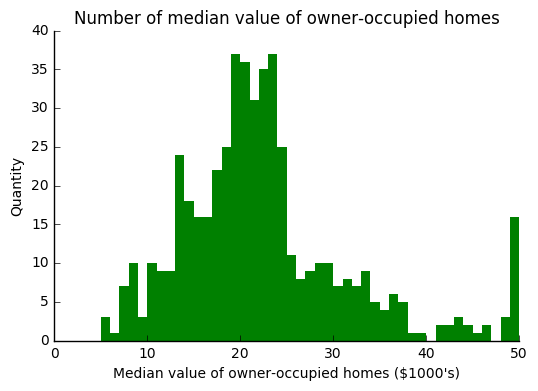

In [9]:
# prepare IPython to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  

hist = plt.hist(bdata.target, color = 'green', edgecolor = "none", bins=np.arange(0, max(bdata.target) + 1, 1))

plt.xlabel("Median value of owner-occupied homes ($1000's)")
plt.ylabel('Quantity')
plt.title('Number of median value of owner-occupied homes')

ax = plt.subplot()
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


### 2.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


Correlation coefficient: -0.385831689884


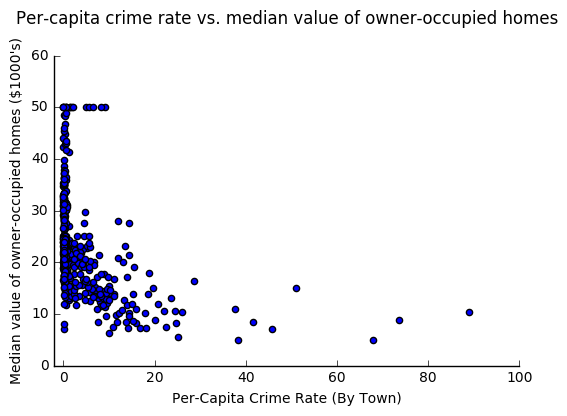

In [19]:
plt.scatter(boston.CRIM, boston.MEDV)
plt.xlabel("Per-Capita Crime Rate (By Town)")
plt.ylabel("Median value of owner-occupied homes ($1000's)")
plt.title("Per-capita crime rate vs. median value of owner-occupied homes", y=1.08)
plt.xlim(xmin=-2)

ax = plt.subplot()
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# correlation coefficient
corr = np.corrcoef(boston['CRIM'], boston['MEDV'])
print ("Correlation coefficient: " + str(corr[0,1]))

### 2.3: Interpret

What do you observe in the above scatter plot? Does there appear to be a relationship between crime rates and housing prices in Boston? Calculate the correlation between these two variables. Do you think this relationship is causal, or just a correlation? Justify your position.

Looking at the scatter plot, it looks like the pattern is decreasing in a negative direction. After calculating the correlation coefficient (-0.3858) this indicates a negative correlation between per-capita crime rate and median value of owner-occupied homes. However, the correlation coefficient is neither close to 1 or -1 but closest to 0. The value 0 indicates no correlation, but because the value is negative, this relationship is considered to be a slightly negative correlation and not at all a strong negative correlation.

This relationship is correlational, especially with a low correlation value. However because the value is closest to 0 (no correlation) rather than -1 (negative correlation), the slight negative correlation may be influenced by unaccounted confounding variables affecting the results.

### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear green and large negative correlations appear green (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated?

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5]),
 <a list of 14 Text xticklabel objects>)

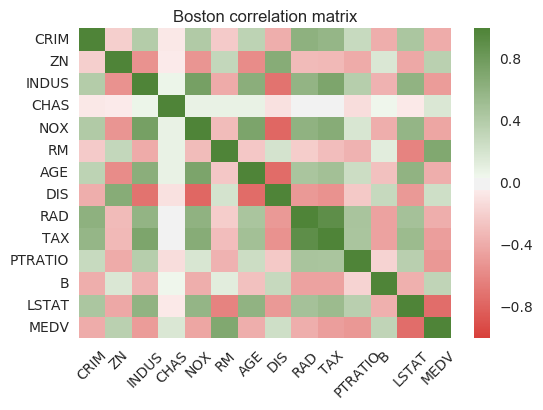

In [60]:
# Source for using seaborn for correlation matrix: http://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas/31384328
import seaborn as sns

# Choosing the red and green color gradient
cmap = sns.diverging_palette(373, 120, as_cmap=True)
plt.title("Boston correlation matrix")

corr = boston.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap=cmap)
plt.xticks(rotation=45)

By looking at the correlation matrix, the variables most positively correlated are full-value property-tax rate per ten thousand dollars (TAX) and index of accessibility to radial highways (RAD). These are the darkest green boxes. The variables most negatively correlated are proportion of non-retail business acres per town (INDUS) and weighted distances to five Boston employment centres (DIS), DIS and nitric oxides concentration (parts per 10 million) (NOX), proportion of owner-occupied units built prior to 1940 (AGE) and DIS, and percent lower status of the population (LSTAT) and median value of owner-occupied homes in thousands (MEDV). These are indicated by the darker red squares.

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

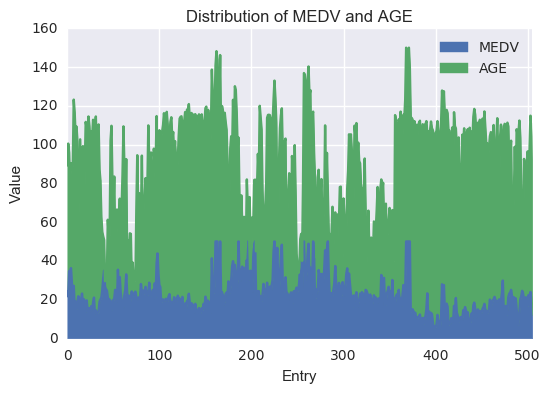

In [61]:
# stacked area chart
df = pd.DataFrame(boston, columns=['MEDV', 'AGE'])
df.plot.area();

plt.xlabel("Entry")
plt.ylabel('Value')
plt.title('Distribution of MEDV and AGE')